<a href="https://colab.research.google.com/github/sabaakram539/Laptop_Price_Predictor/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Price Prediction**

## **Step 1. Understanding the problem**
In this project we are going to predict the price of the laptop based on the various attributes present in the laptop. The predictors consists of RAM, Memory, weight, Company name, screen redolution, screensize and similar attributes.

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Step 2. Data Collection**

In [323]:
laptop=pd.read_csv('laptop_data.csv')

In [324]:
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [325]:
laptop.shape

(1303, 12)

In [326]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## **Step 3. Data Preprocessing and Feature Engineering**

In [327]:
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [328]:
laptop=laptop.drop(['Unnamed: 0'],axis=1)

In [329]:
laptop.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [330]:
laptop.duplicated().sum()

29

In [331]:
laptop=laptop.drop_duplicates()

**Dealing with the columns**

> **ScreenResolution**

In [332]:
laptop.ScreenResolution.value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [333]:
laptop['TouchScreen']=laptop['ScreenResolution'].apply(lambda x: 'Yes' if 'Touchscreen' in x else 'No')

In [334]:
laptop.TouchScreen.value_counts()

No     1086
Yes     188
Name: TouchScreen, dtype: int64

In [335]:
laptop['IPS']=laptop['ScreenResolution'].apply(lambda x: 'Yes' if 'IPS' in x else 'No')

In [336]:
laptop.IPS.value_counts()

No     917
Yes    357
Name: IPS, dtype: int64

In [337]:
new=laptop['ScreenResolution'].str.split('x',n=1,expand=True)

In [338]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [339]:
laptop['x_res']=new[0]
laptop['y_res']=new[1]

In [340]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
491,Toshiba,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,149130.7200,Yes,No,Full HD / Touchscreen 1920,1080
289,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,35112.0528,No,No,Full HD 1920,1080
383,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.5kg,58554.7200,No,Yes,IPS Panel Full HD 1920,1080
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,53226.7200,No,Yes,IPS Panel Full HD 1920,1080
1004,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,63669.6000,No,No,Full HD 1920,1080


In [341]:
laptop['x_res']=laptop['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [342]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,No,Yes,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,No,No,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,No,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,No,Yes,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,No,Yes,2560,1600


In [343]:
laptop[['x_res','y_res']]=laptop[['x_res','y_res']].astype(int)

In [344]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   object 
 12  IPS               1274 non-null   object 
 13  x_res             1274 non-null   int64  
 14  y_res             1274 non-null   int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 159.2+ KB


In [345]:
laptop['ppi']=((laptop['x_res']**2)+(laptop['y_res']**2))/laptop['Inches'].astype(float)

In [346]:
laptop.drop(['ScreenResolution','Inches','x_res','y_res'],axis=1,inplace=True)

> **Cpu**

In [347]:
laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
AMD FX 8800P 2.1GHz              1
Intel Core i7 7500U 2.5GHz       1
AMD E-Series E2-9000 2.2GHz      1
Intel Core i7 2.2GHz             1
Intel Core i5 7200U 2.70GHz      1
Name: Cpu, Length: 118, dtype: int64

In [348]:
laptop['Cpu name']=laptop['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [349]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,No,Yes,685233.082707,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,No,No,216812.030075,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,No,311076.923077,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,No,Yes,748987.012987,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,No,Yes,685233.082707,Intel Core i5


In [350]:
def processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=="intel":
      return "Other Intel Processor"
    else:
      return "AMD Processor"

In [351]:
laptop['CPU Brand']=laptop['Cpu name'].apply(processor)

In [352]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,No,Yes,685233.082707,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,No,No,216812.030075,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,No,311076.923077,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,No,Yes,748987.012987,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,No,Yes,685233.082707,Intel Core i5,Intel Core i5


In [353]:
laptop.drop(['Cpu','Cpu name'],axis=1,inplace=True)

In [354]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,No,Yes,685233.082707,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,No,No,216812.030075,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,No,311076.923077,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,No,Yes,748987.012987,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,No,Yes,685233.082707,Intel Core i5


> **RAM**

In [355]:
laptop['Ram']=laptop['Ram'].str.replace("GB","").astype(int)

> **Weight**

In [356]:
laptop['Weight']=laptop['Weight'].str.replace("kg","").astype(float)

> **Memory**

In [357]:
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000')
new = laptop["Memory"].str.split("+", n = 1, expand = True)
new.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [358]:
laptop["first"]= new[0]
laptop["first"]=laptop["first"].str.strip()
laptop["second"]= new[1]

In [359]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,256 SSD,None


In [360]:
laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [361]:
laptop.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,128 Flash Storage,None,0,0,0,1


In [362]:
laptop['first'] = laptop['first'].str.replace(r'\D', '')
laptop["second"].fillna("0", inplace = True)

In [363]:
laptop.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,128,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,128,0,0,0,0,1


In [364]:
laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [365]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,256,0,0,1,0,0,0,0,0,0


In [366]:
laptop['second'] = laptop['second'].str.replace(r'\D', '')

In [367]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,256,0,0,1,0,0,0,0,0,0


In [368]:
laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

In [369]:
laptop["HDD"]=(laptop["first"]*laptop["Layer1HDD"]+laptop["second"]*laptop["Layer2HDD"])
laptop["SSD"]=(laptop["first"]*laptop["Layer1SSD"]+laptop["second"]*laptop["Layer2SSD"])
laptop["Hybrid"]=(laptop["first"]*laptop["Layer1Hybrid"]+laptop["second"]*laptop["Layer2Hybrid"])
laptop["Flash_Storage"]=(laptop["first"]*laptop["Layer1Flash_Storage"]+laptop["second"]*laptop["Layer2Flash_Storage"])

In [370]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,128,0,0,1,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,128,0,0,0,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,256,0,0,1,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,512,0,0,1,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,256,0,0,1,0,0,0,0,0,0,0,256,0,0


In [371]:
laptop.drop(columns=['Memory','first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid',
                     'Layer2Flash_Storage'],inplace=True)

In [372]:
laptop.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,0,0


> **GPU**

In [373]:
laptop['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R9 M385           1
Intel Iris Graphics 550      1
Nvidia GeForce GTX 940M      1
Intel HD Graphics 540        1
AMD FirePro W4190M           1
Name: Gpu, Length: 110, dtype: int64

In [374]:
laptop['GPU Brand']=laptop['Gpu'].apply(lambda x: x.split()[0])

In [375]:
laptop.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,0,0,Intel


In [376]:
laptop.drop(['Gpu'],axis=1,inplace=True)

In [377]:
laptop.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,0,0,Intel


> **OpSys**

In [378]:
laptop.OpSys.value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [379]:
def OS(input):
  if input=='Windows 10' or input=='Windows 7' or input=='Windows 10 S':
    return 'Windows'
  elif input=='MacOS' or input=='Mac OS X':
    return 'Mac'
  else:
    return 'Other/No OS/Linux'

In [380]:
laptop['OS']=laptop['OpSys'].apply(OS)

In [381]:
laptop.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,0,0,Intel,Other/No OS/Linux
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,0,128,Intel,Other/No OS/Linux
2,HP,Notebook,8,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,0,0,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,0,0,AMD,Other/No OS/Linux
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,0,0,Intel,Other/No OS/Linux


In [382]:
laptop.drop(['OpSys'],axis=1,inplace=True)

In [383]:
laptop.corr()['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
ppi              0.476314
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [384]:
laptop.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)

## **Step 4. Exploratory Data Analysis**

In [385]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,Intel,Other/No OS/Linux
1,Apple,Ultrabook,8,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,Intel,Other/No OS/Linux
2,HP,Notebook,8,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,AMD,Other/No OS/Linux
4,Apple,Ultrabook,8,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,Intel,Other/No OS/Linux


> **Dealing with the target variable**

In [386]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


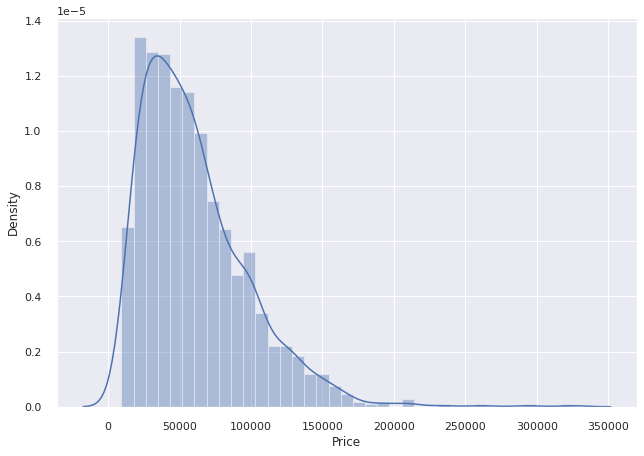

In [387]:
sns.distplot(laptop['Price'])

> **Dealing with the other categorical variables**

In [388]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,Intel,Other/No OS/Linux
1,Apple,Ultrabook,8,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,Intel,Other/No OS/Linux
2,HP,Notebook,8,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,AMD,Other/No OS/Linux
4,Apple,Ultrabook,8,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,Intel,Other/No OS/Linux


In [389]:
categorical_columns=['Company','TypeName','Ram','TouchScreen','IPS','CPU Brand','HDD','SSD','GPU Brand','OS']

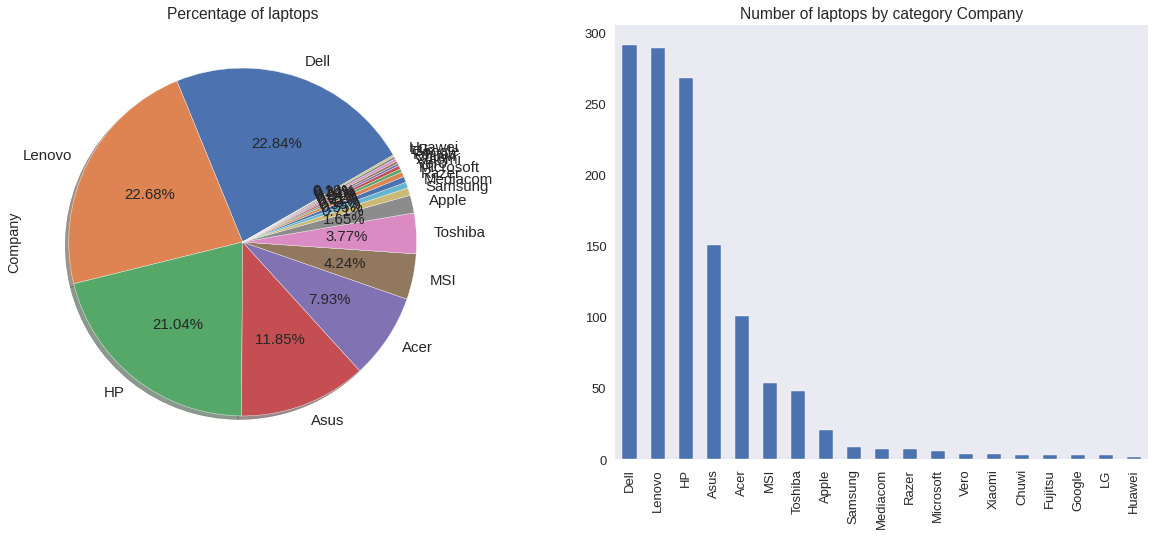

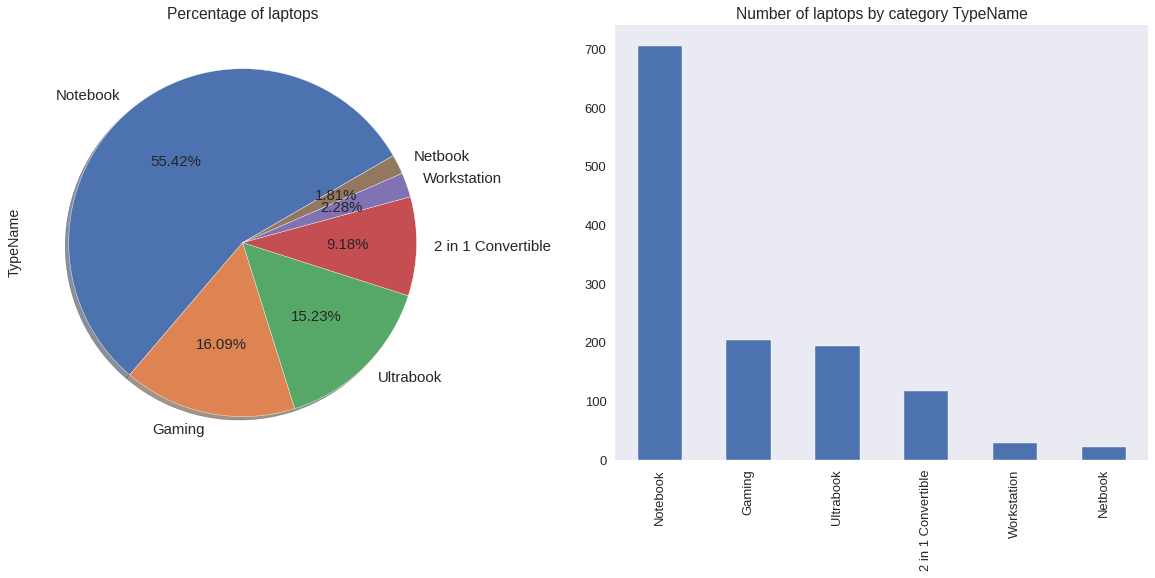

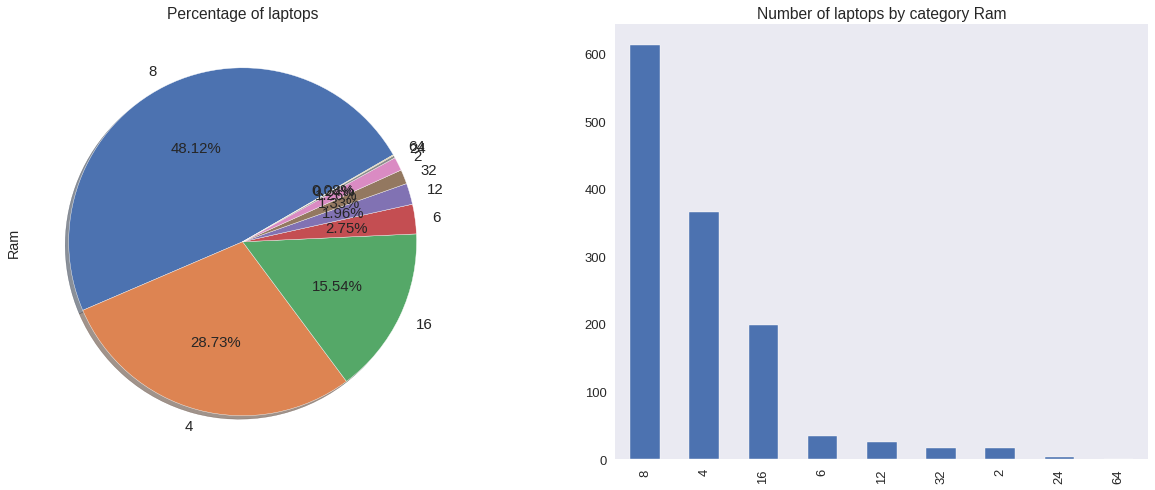

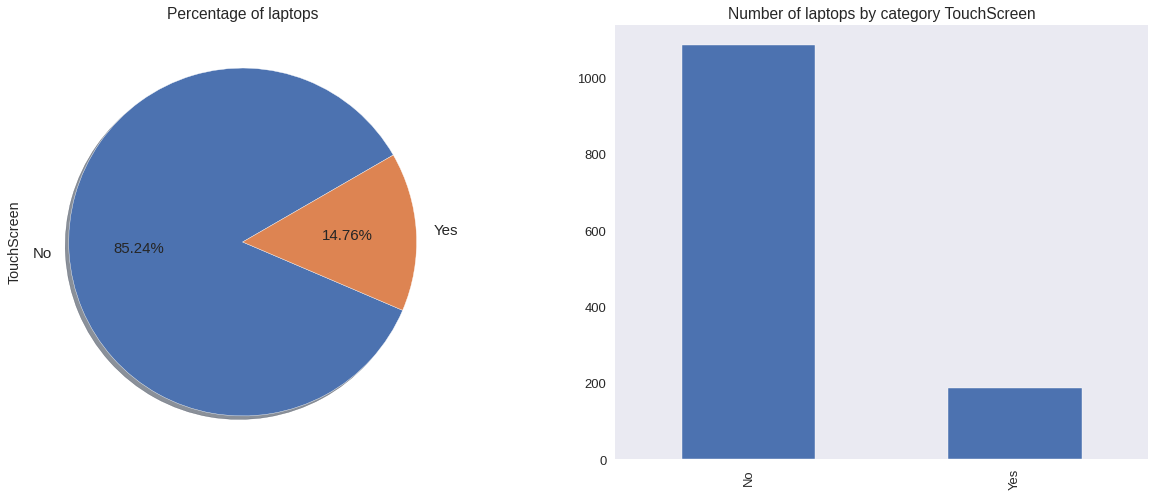

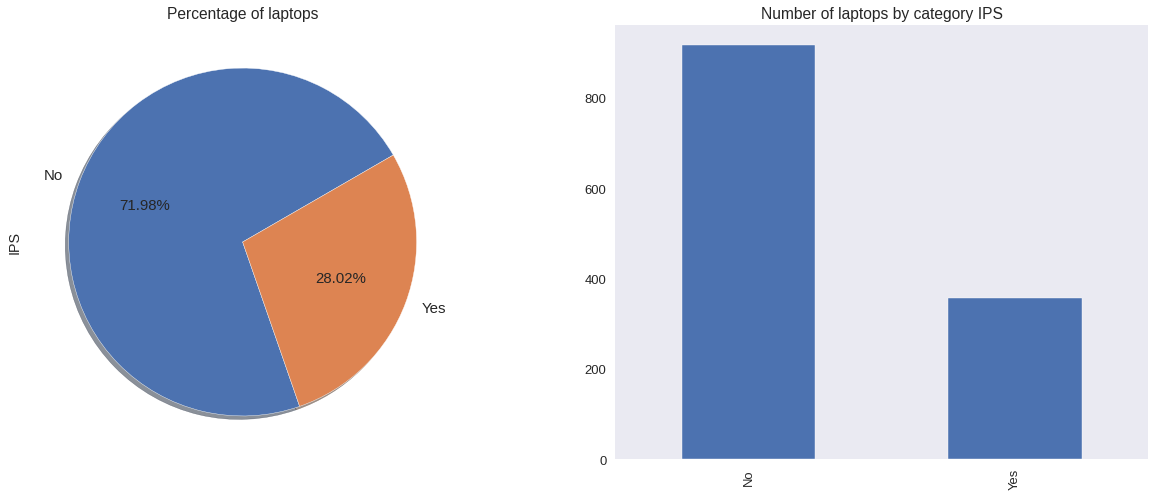

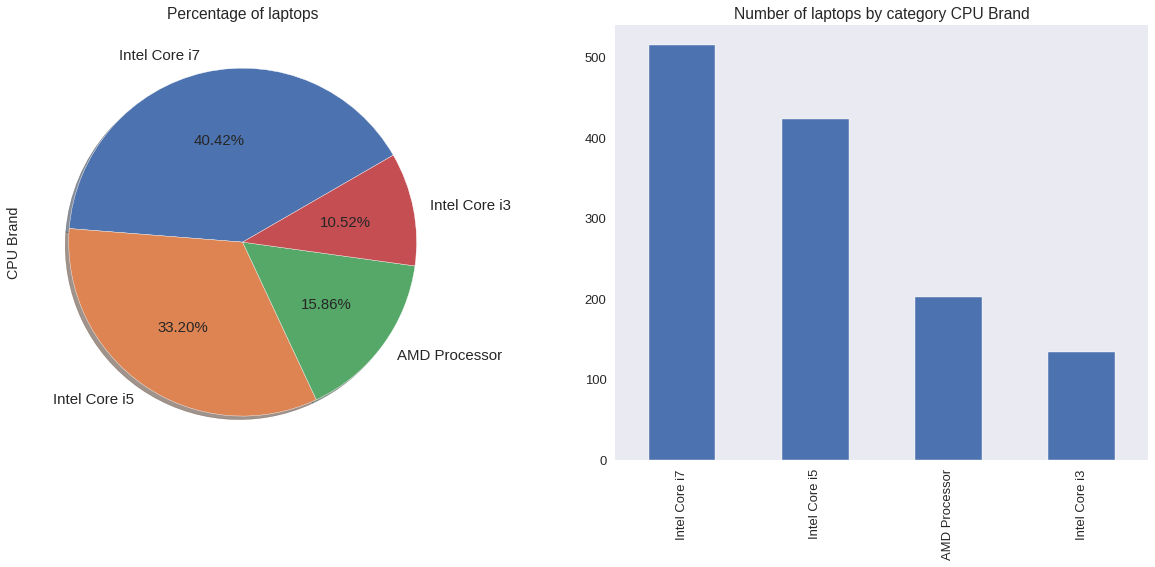

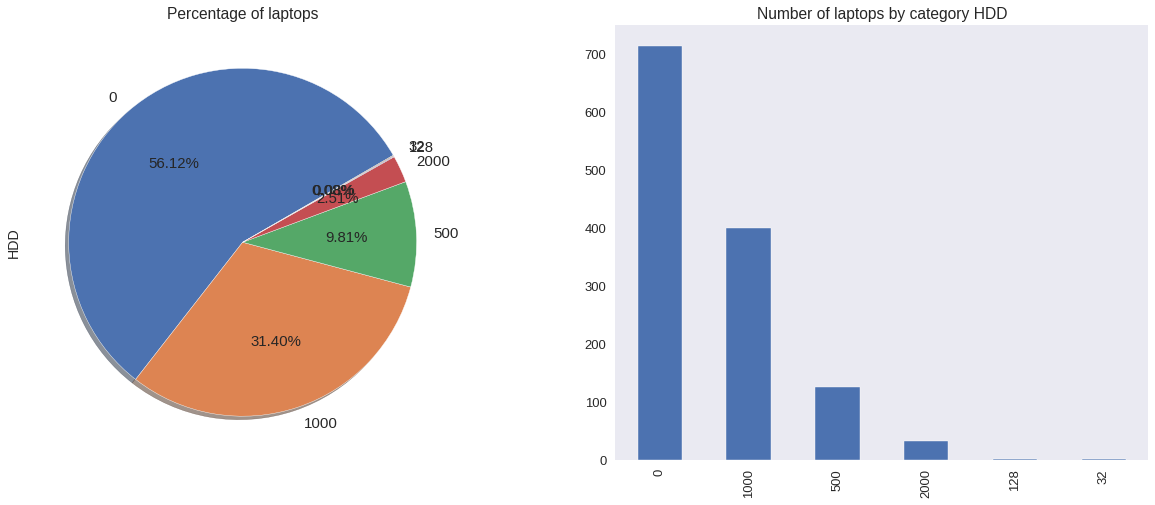

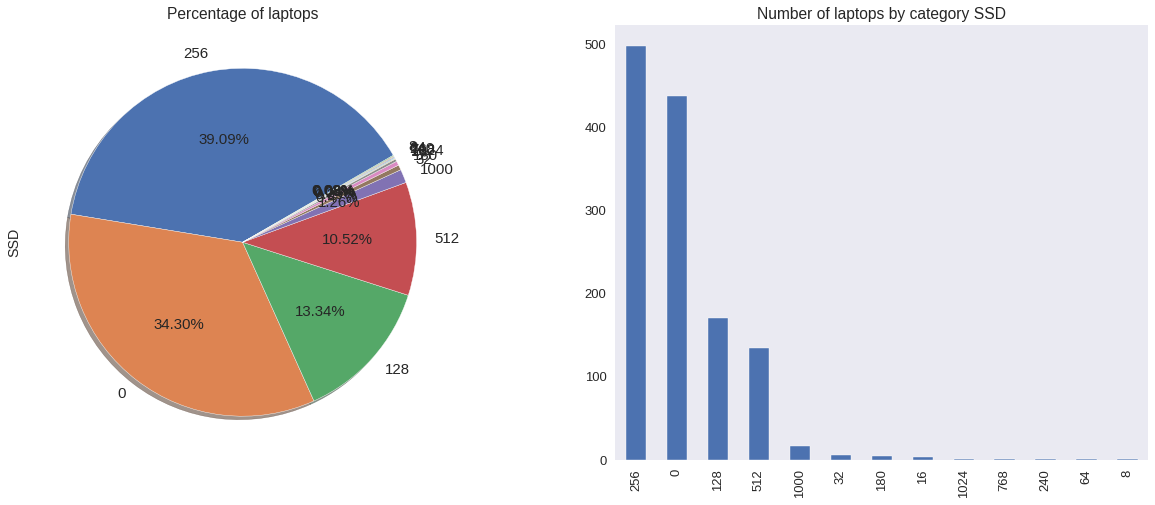

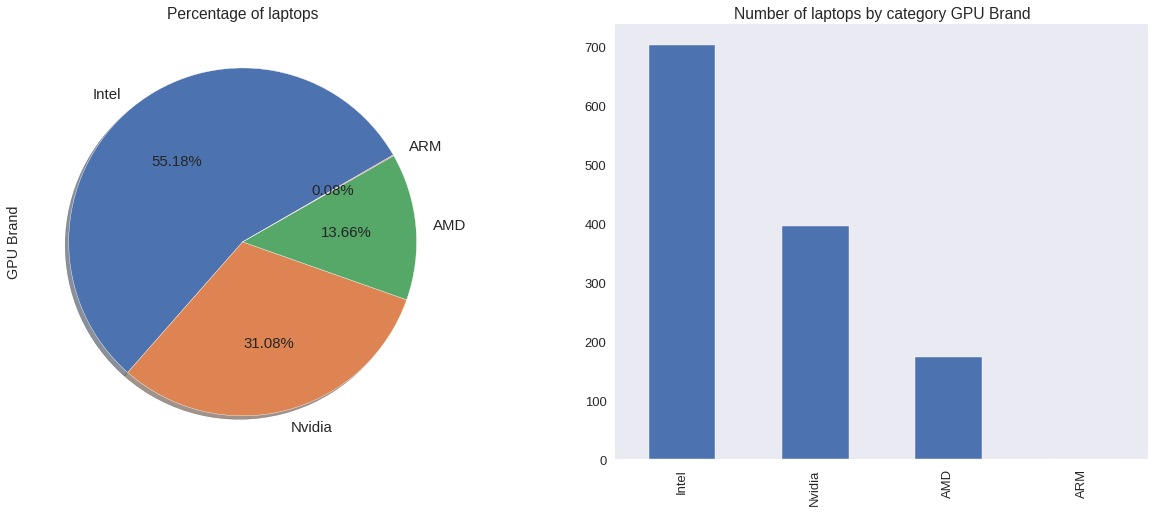

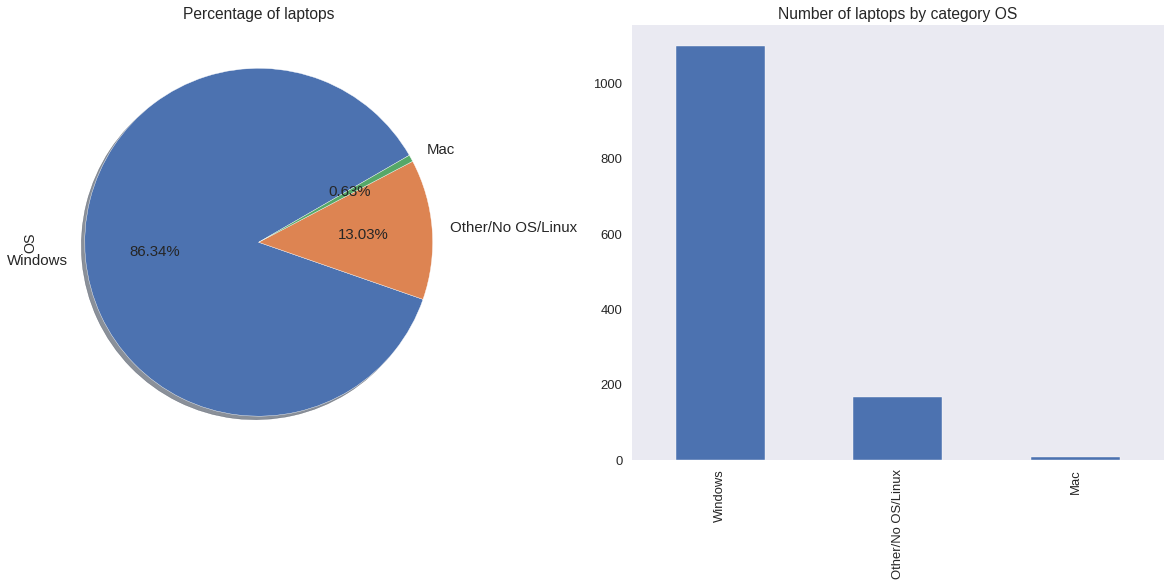

In [390]:
for i in categorical_columns:
  plt.style.use(['seaborn-dark','seaborn-talk'])
  fig,ax=plt.subplots(1,2,figsize=(21,8))
  laptop[i].value_counts().plot.pie(ax=ax[0],autopct="%1.2f%%",shadow=True,fontsize=15,startangle=30)
  ax[0].set_title("Percentage of laptops")

  laptop[i].value_counts().plot.bar(ax=ax[1])
  ax[1].set_title("Number of laptops by category "+str(i))
  plt.show()

> **Target Variables with Predictors**

In [391]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1274 non-null   object 
 1   TypeName     1274 non-null   object 
 2   Ram          1274 non-null   int64  
 3   Weight       1274 non-null   float64
 4   Price        1274 non-null   float64
 5   TouchScreen  1274 non-null   object 
 6   IPS          1274 non-null   object 
 7   ppi          1274 non-null   float64
 8   CPU Brand    1274 non-null   object 
 9   HDD          1274 non-null   int64  
 10  SSD          1274 non-null   int64  
 11  GPU Brand    1274 non-null   object 
 12  OS           1274 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 139.3+ KB


In [392]:
factors_categorical=['Company', 'TypeName','Ram','TouchScreen', 'IPS','CPU Brand','GPU Brand', 'OS']

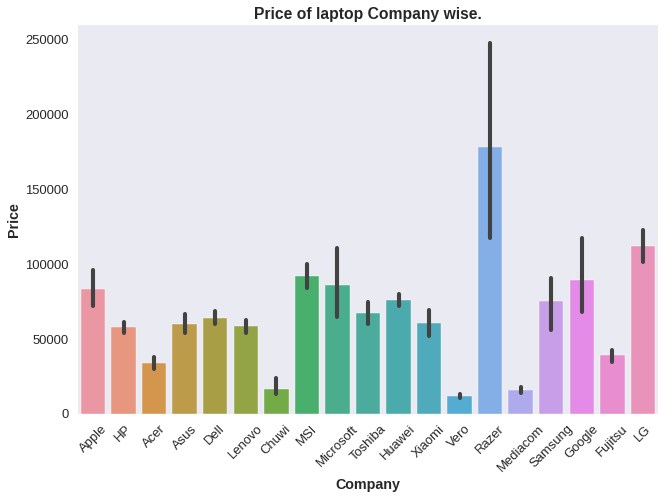

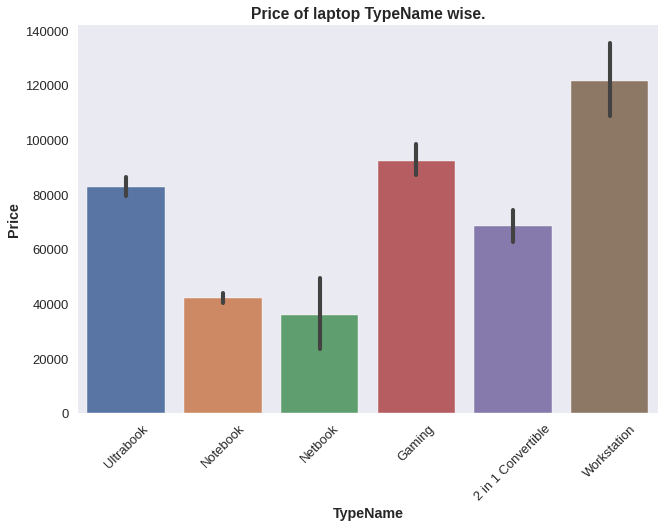

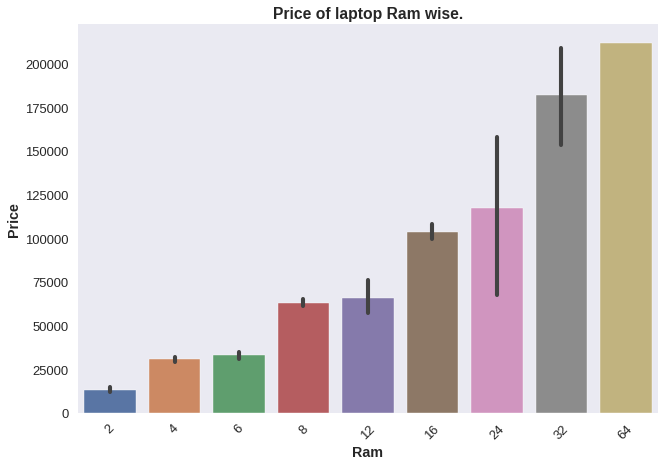

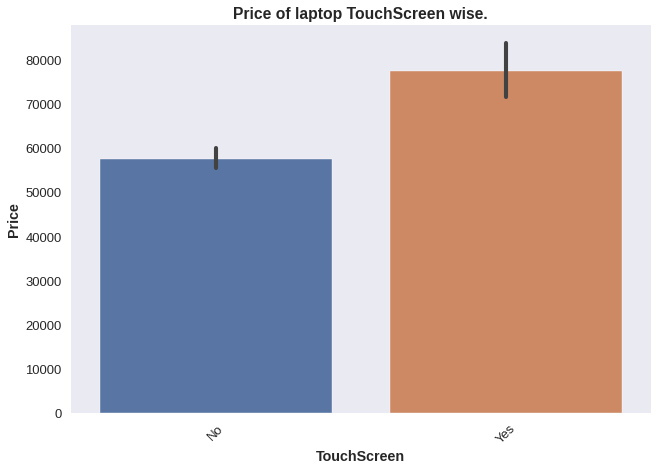

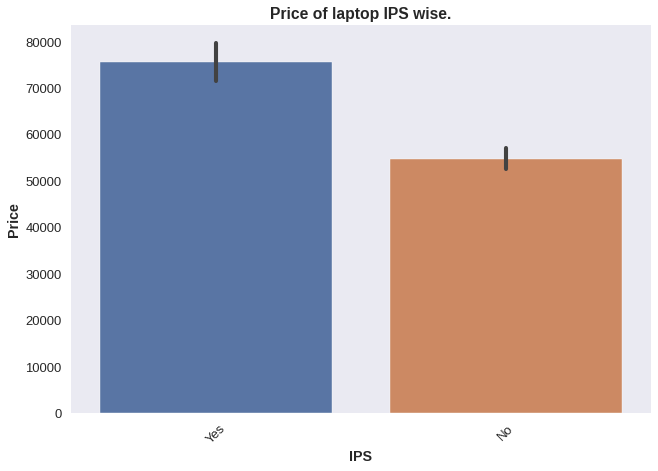

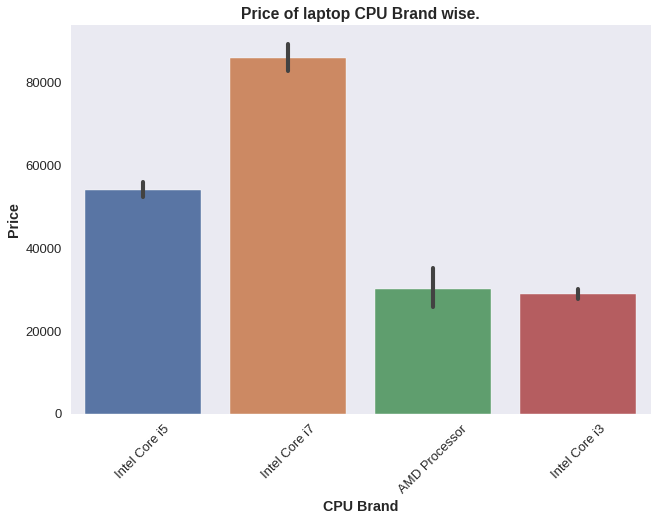

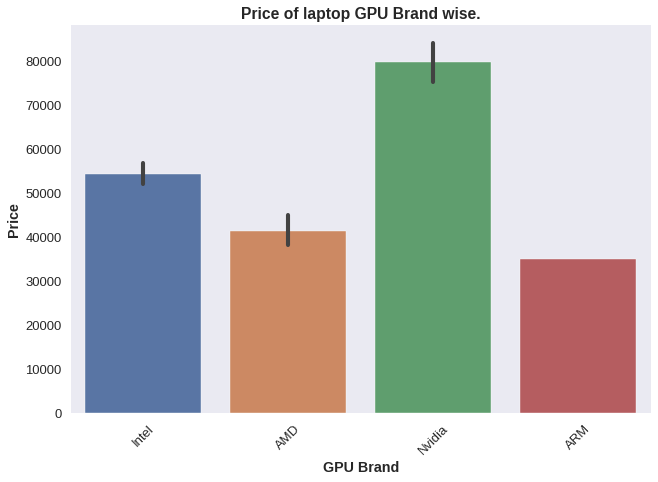

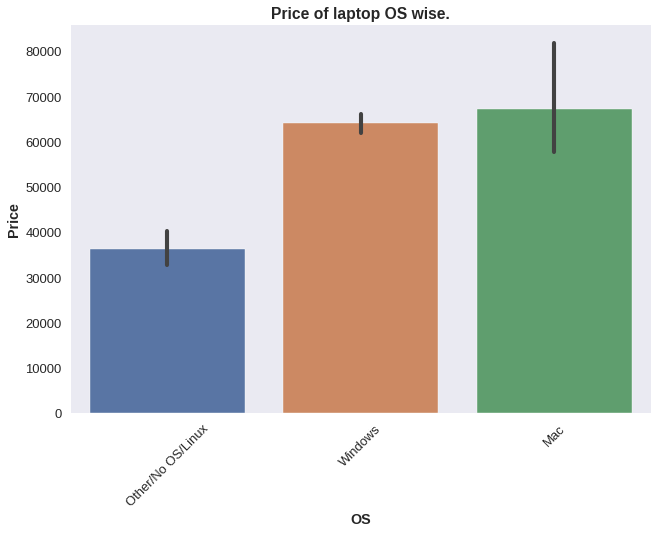

In [393]:
for i, predictor in enumerate(laptop[factors_categorical]):
  plt.figure(i)
  plt.xlabel(predictor,fontweight='bold')
  plt.ylabel("Price",fontweight='bold')
  plt.title("Price of laptop "+str(factors_categorical[i])+" wise.",fontweight='bold')
  sns.barplot(x=laptop[predictor],y=laptop['Price'],edgecolor = 'w')
  plt.xticks(rotation=45)

In [394]:
factors_numerical=['Weight','ppi','HDD','SSD']

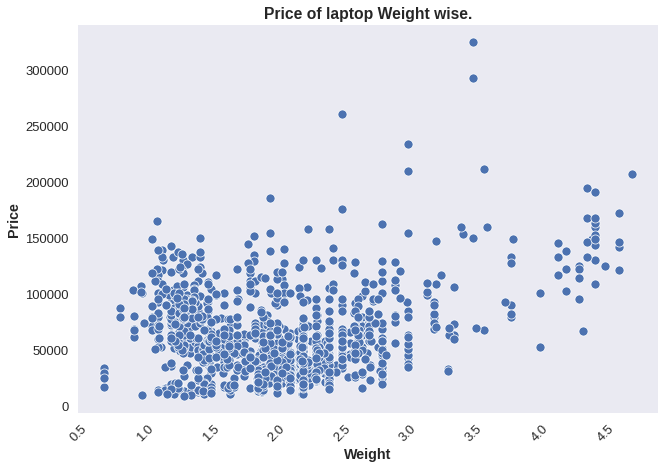

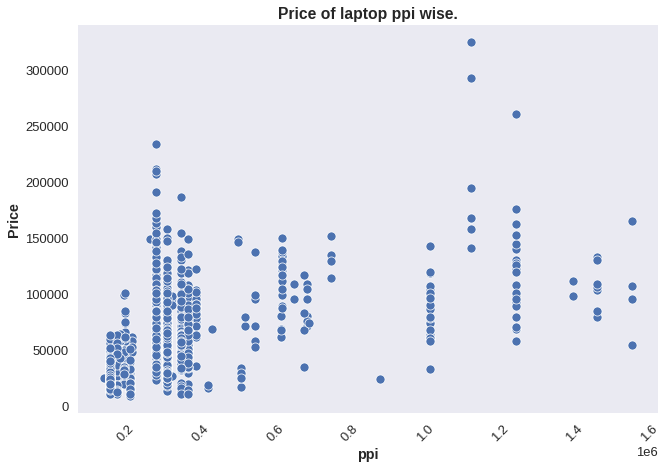

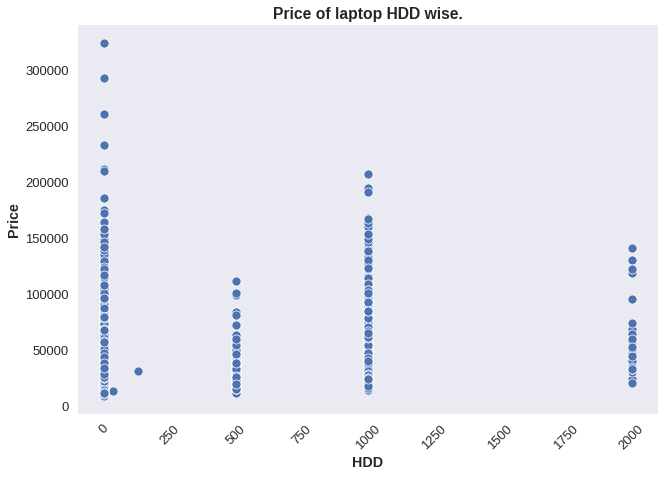

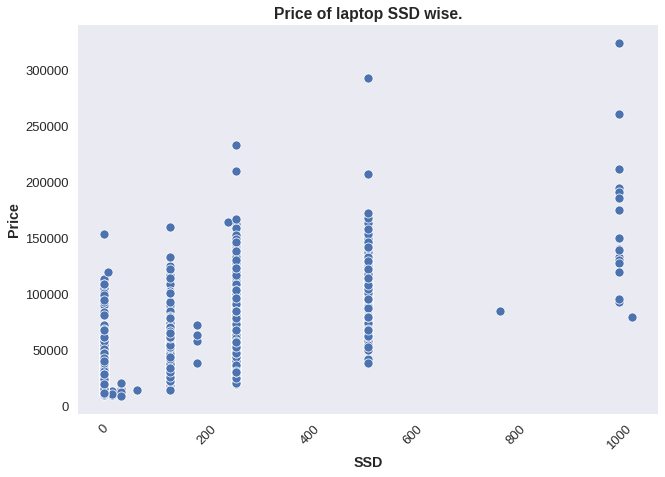

In [395]:
for i, predictor in enumerate(laptop[factors_numerical]):
  plt.figure(i)
  plt.xlabel(predictor,fontweight='bold')
  plt.ylabel("Price",fontweight='bold')
  plt.title("Price of laptop "+str(factors_numerical[i])+" wise.",fontweight='bold')
  sns.scatterplot(x=laptop[predictor],y=laptop['Price'])
  plt.xticks(rotation=45)

## **Step 5. Feature Engineering**

> **Dealing with Binary Variables**

In [396]:
laptop.nunique()==2

Company        False
TypeName       False
Ram            False
Weight         False
Price          False
TouchScreen     True
IPS             True
ppi            False
CPU Brand      False
HDD            False
SSD            False
GPU Brand      False
OS             False
dtype: bool

In [397]:
laptop['TouchScreen'].value_counts()

No     1086
Yes     188
Name: TouchScreen, dtype: int64

In [398]:
laptop['IPS'].value_counts()

No     917
Yes    357
Name: IPS, dtype: int64

In [399]:
laptop['TouchScreen']=laptop['TouchScreen'].map({'Yes':1,'No':0})
laptop['IPS']=laptop['IPS'].map({'Yes':1,'No':0})

> **Dealing with multivariate Variables**

In [400]:
laptop.nunique()

Company         19
TypeName         6
Ram              9
Weight         171
Price          791
TouchScreen      2
IPS              2
ppi             39
CPU Brand        4
HDD              6
SSD             13
GPU Brand        4
OS               3
dtype: int64

In [401]:
multivariate_columns=['Company','TypeName','CPU Brand','GPU Brand','OS']

In [402]:
for i in multivariate_columns:
  dummies=pd.get_dummies(laptop[i],prefix=i,drop_first=True)
  laptop=pd.concat([laptop,dummies],axis=1)

In [403]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU Brand_Intel Core i3,CPU Brand_Intel Core i5,CPU Brand_Intel Core i7,GPU Brand_ARM,GPU Brand_Intel,GPU Brand_Nvidia,OS_Other/No OS/Linux,OS_Windows
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,685233.082707,Intel Core i5,0,128,Intel,Other/No OS/Linux,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,216812.030075,Intel Core i5,0,0,Intel,Other/No OS/Linux,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
2,HP,Notebook,8,1.86,30636.0000,0,0,311076.923077,Intel Core i5,0,256,Intel,Other/No OS/Linux,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,748987.012987,Intel Core i7,0,512,AMD,Other/No OS/Linux,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,685233.082707,Intel Core i5,0,256,Intel,Other/No OS/Linux,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [404]:
laptop.drop(multivariate_columns,axis=1,inplace=True)

In [405]:
laptop.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU Brand_Intel Core i3,CPU Brand_Intel Core i5,CPU Brand_Intel Core i7,GPU Brand_ARM,GPU Brand_Intel,GPU Brand_Nvidia,OS_Other/No OS/Linux,OS_Windows
0,8,1.37,71378.6832,0,1,685233.082707,0,128,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
1,8,1.34,47895.5232,0,0,216812.030075,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
2,8,1.86,30636.0000,0,0,311076.923077,0,256,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
3,16,1.83,135195.3360,0,1,748987.012987,0,512,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,8,1.37,96095.8080,0,1,685233.082707,0,256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [406]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ram                      1274 non-null   int64  
 1   Weight                   1274 non-null   float64
 2   Price                    1274 non-null   float64
 3   TouchScreen              1274 non-null   int64  
 4   IPS                      1274 non-null   int64  
 5   ppi                      1274 non-null   float64
 6   HDD                      1274 non-null   int64  
 7   SSD                      1274 non-null   int64  
 8   Company_Apple            1274 non-null   uint8  
 9   Company_Asus             1274 non-null   uint8  
 10  Company_Chuwi            1274 non-null   uint8  
 11  Company_Dell             1274 non-null   uint8  
 12  Company_Fujitsu          1274 non-null   uint8  
 13  Company_Google           1274 non-null   uint8  
 14  Company_HP              

## **Step 5. Model Building**

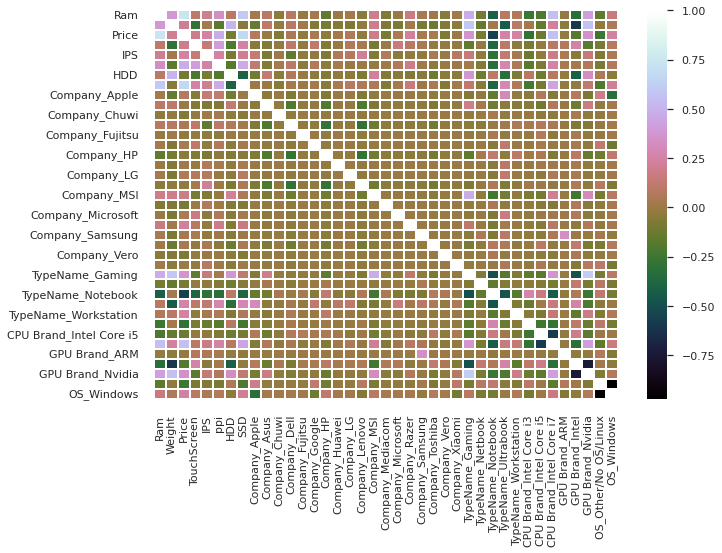

In [407]:
sns.set(font_scale=1)
plot=sns.heatmap(laptop.corr(),cmap="cubehelix",linewidths=1,square=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


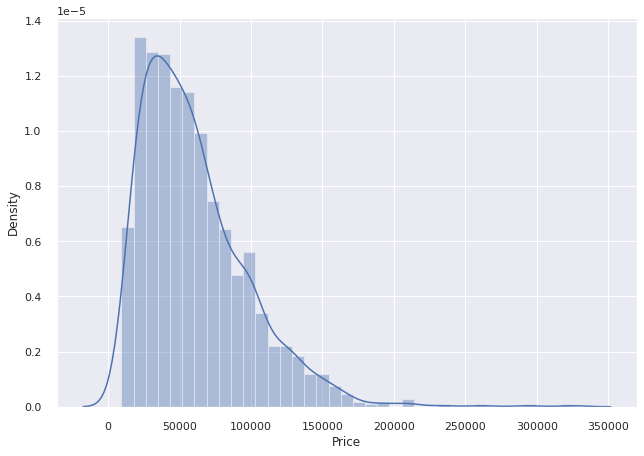

In [408]:
sns.distplot(laptop['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


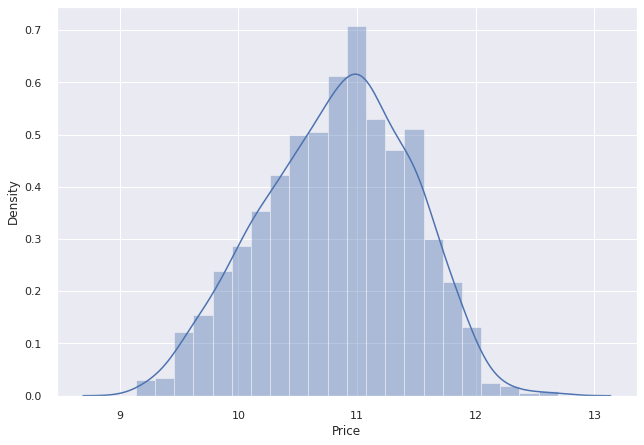

In [409]:
sns.distplot(np.log(laptop['Price']))

In [410]:
x=laptop.drop(['Price'],axis=1)
y=np.log(laptop.Price)

In [411]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state=6)

In [412]:
from sklearn.metrics import r2_score,mean_absolute_error,confusion_matrix,accuracy_score

> **Linear Regression**

In [413]:
from sklearn.linear_model import LinearRegression

In [414]:
linear=LinearRegression().fit(x_train,y_train)

In [415]:
linear_pred=linear.predict(x_test)

In [416]:
print('R2 Score : ',r2_score(y_test,linear_pred))
print('MAE : ',mean_absolute_error(y_test,linear_pred))

R2 Score :  0.8192808798671467
MAE :  0.20641559618757466


> **Ridge Regression**

In [417]:
from sklearn.linear_model import Ridge

In [418]:
ridge=Ridge(alpha=10)

In [419]:
ridge.fit(x_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [420]:
ridge_pred=ridge.predict(x_test)

In [421]:
print('R2 Score : ',r2_score(y_test,ridge_pred))
print('MAE : ',mean_absolute_error(y_test,ridge_pred))

R2 Score :  0.8204023658756707
MAE :  0.20964162045857537


> **Lasso Regression**

In [422]:
from sklearn.linear_model import Lasso

In [423]:
lasso=Lasso()

In [424]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [425]:
lasso_pred=lasso.predict(x_test)

In [426]:
print('R2 Score : ',r2_score(y_test,lasso_pred))
print('MAE : ',mean_absolute_error(y_test,lasso_pred))

R2 Score :  0.5452685330436842
MAE :  0.3444294319009213


> **KNN Regressor**

In [427]:
from sklearn.neighbors import KNeighborsRegressor

In [428]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [429]:
knn_pred=knn.predict(x_test)

In [430]:
print('R2_Score : ',r2_score(y_test,knn_pred))
print('MAE : ',mean_absolute_error(y_test,knn_pred))

R2_Score :  0.7962008173006236
MAE :  0.20450987838952162


> **DecisionTree Regressor**

In [431]:
from sklearn.tree import DecisionTreeRegressor

In [432]:
tree=DecisionTreeRegressor(max_depth=8)

In [433]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [434]:
tree_pred=tree.predict(x_test)

In [435]:
print('R2_Score : ',r2_score(y_test,tree_pred))
print('MAE : ',mean_absolute_error(y_test,tree_pred))

R2_Score :  0.8316751249275306
MAE :  0.19022363361447528


> **Random Forest Regressor**

In [436]:
from sklearn.ensemble import RandomForestRegressor

In [437]:
forest=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

In [438]:
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=0.75, max_leaf_nodes=None,
                      max_samples=0.5, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [439]:
forest_pred=forest.predict(x_test)

In [440]:
print('R2_Score : ',r2_score(y_test,forest_pred))
print('MAE : ',mean_absolute_error(y_test,forest_pred))

R2_Score :  0.8866587144280553
MAE :  0.1603313358962514


> **ExtraTrees Regressor**

In [441]:
from sklearn.ensemble import ExtraTreesRegressor

In [442]:
extra=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

In [443]:
extra.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=15, max_features=0.75, max_leaf_nodes=None,
                    max_samples=0.5, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=3, verbose=0, warm_start=False)

In [444]:
extra_pred=extra.predict(x_test)

In [445]:
print('R2_Score : ',r2_score(y_test,extra_pred))
print('MAE : ',mean_absolute_error(y_test,extra_pred))

R2_Score :  0.8904065022367412
MAE :  0.1515067879435257


> **SVM**

In [446]:
from sklearn.svm import SVR

In [447]:
sup_vec=SVR(kernel='rbf',C=10000,epsilon=0.1)

In [448]:
sup_vec.fit(x_train,y_train)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [449]:
sup_vec_pred=sup_vec.predict(x_test)

In [450]:
print('R2_Score : ',r2_score(y_test,sup_vec_pred))
print('MAE : ',mean_absolute_error(y_test,sup_vec_pred))

R2_Score :  0.5763915678030724
MAE :  0.32261283503804394


## **Conclusion**

After trying on the various model, we observe that the ExtraTrees Regressor model has the highest accuracy with Score of 89 % followed by the RandomForest Regressor with score of 88.60 %.